<a href="https://colab.research.google.com/github/SpitsynMatvey/Engineering/blob/main/%D0%97%D0%B0%D1%8F%D1%86_%D0%B8_%D0%A1%D0%BE%D0%B1%D0%B0%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-e770c9261746>:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  H_point.set_data(XH[i], YH[i])
<ipython-input-4-e770c9261746>:66: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  D_point.set_data(XD[i], YD[i])


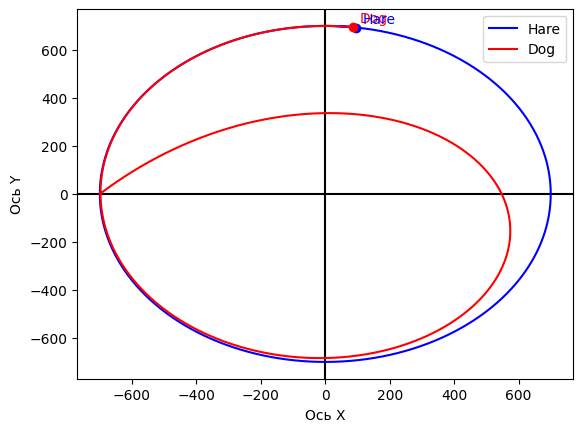

In [ ]:
# импорт пакетов
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

#Начальные условия задачи
R = 700
VH = 5
VD = 5.35
DeltaT = 1
DeltaA = (VH * DeltaT) / R
n = 900

#Начальные положения точек через массивы нулей
XH = np.zeros(n)
YH = np.zeros(n)
XD = np.zeros(n)
YD = np.zeros(n)
f = np.zeros(n)
XD[0] = -R
YD[0] = 0

#цикл движения нашей животины
for i in range(n):
    XH[i] = R * np.sin(DeltaA * i)
    YH[i] = R * np.cos(DeltaA * i)
    f[i] = np.arctan2((YH[i] - YD[i]), (XH[i] - XD[i])) #2 после arctg т.к. он от двух переменных

#Задаём пустой график, ограниченный
fig, ax = plt.subplots()
ax.set_xlim(-R, R)
ax.set_ylim(-R, R)

# Добавляем оси X и Y
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# Изменяем пределы осей
ax.set_xlim(-R*1.1, R*1.1)
ax.set_ylim(-R*1.1, R*1.1)

# Добавляем название осей
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')

#Параметры линий графика
H_line, = ax.plot([], [], 'b-', label='Hare') #Используется в скобках а-ля augment, чтобы добавить информацию
D_line, = ax.plot([], [], 'r-', label='Dog')
H_point, = ax.plot([], [], 'bo')
D_point, = ax.plot([], [], 'ro')
dog_label = ax.text(0, 0, '', color='red')  # Пустая надпись для Dog
hare_label = ax.text(0, 0, '', color='blue')
#инициализирует начальные атрибуты
def init():
    H_line.set_data([], [])
    D_line.set_data([], [])
    H_point.set_data([], [])
    D_point.set_data([], [])
    return H_line, D_line, H_point, D_point

# Вызывает функцию анимации
def animate(i):
    H_line.set_data(XH[:i+1], YH[:i+1])
    D_line.set_data(XD[:i+1], YD[:i+1])
    H_point.set_data(XH[i], YH[i])
    D_point.set_data(XD[i], YD[i])
    dog_label.set_text('Dog')  # Устанавливаем текст надписи
    dog_label.set_position((XD[i] + 20, YD[i] + 20))  # Позиционируем надпись рядом с точкой
    hare_label.set_text('Hare')  # Устанавливаем текст надписи
    hare_label.set_position((XH[i] + 20, YH[i] + 20))  # Позиционируем надпись рядом с точкой
    return H_line, D_line, H_point, D_point, dog_label

def update(frame):
    global XD, YD, f
    if frame < n-1:
        XD[frame+1] = XD[frame] + VD * DeltaT * np.cos(f[frame])
        YD[frame+1] = YD[frame] + VD * DeltaT * np.sin(f[frame])
        f[frame+1] = np.arctan2((YH[frame] - YD[frame]), (XH[frame] - XD[frame]))

    return animate(frame)

ax.legend()
ani = animation.FuncAnimation(fig, update, frames=n, interval=100, blit=True, init_func=init)
ani.save('WolfHare.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()